In [92]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
import datetime
import re

In [124]:
def to_millis(h, m, s, mi, re):
    return (((h*60 + m)*60 + s)*1000 + mi + re) 

In [152]:
output = """\

Stop at time: Infinity.
LP 0: initializing simulation objects
01:00:01:000:0 / radiation /    100.00000
02:00:02:000:0 / wind_speed /   1500.00000
02:30:02:030:0 / power_consumption /   3000.00000
03:00:03:000:0 / radiation /   2000.00000
04:01:01:000:0 / radiation /    500.00000
04:30:01:000:0 / power_consumption /  50000.00000
05:01:02:000:0 / wind_speed /   1500.00000
06:01:03:000:0 / radiation /   4500.00000
LP 0: starting simulation (NoTime).
01:00:01:000:0 0 (ext)
02:00:01:000:0 100 (int)
02:00:02:000:0 100.028 (ext)
02:15:01:937:0.5 500 (int)
consumming 00:21:25:714:0.25
500 -0.000388889
02:30:02:030:0 500 (ext)
"""

data = [x.split() for x in output.split("\n") if re.match("^\d+:\d+:\d+:\d+:\d+(\.\d+)? \d+(\.\d+)? \(\w+\)", x)]

In [153]:
data

[['01:00:01:000:0', '0', '(ext)'],
 ['02:00:01:000:0', '100', '(int)'],
 ['02:00:02:000:0', '100.028', '(ext)'],
 ['02:15:01:937:0.5', '500', '(int)'],
 ['02:30:02:030:0', '500', '(ext)']]

In [154]:
processed = [
    (to_millis(*map(float, t.split(':'))), float(v))
    for t, v, p in data
]

In [155]:
processed

[(3601000.0, 0.0),
 (7201000.0, 100.0),
 (7202000.0, 100.028),
 (8101937.5, 500.0),
 (9002030.0, 500.0)]

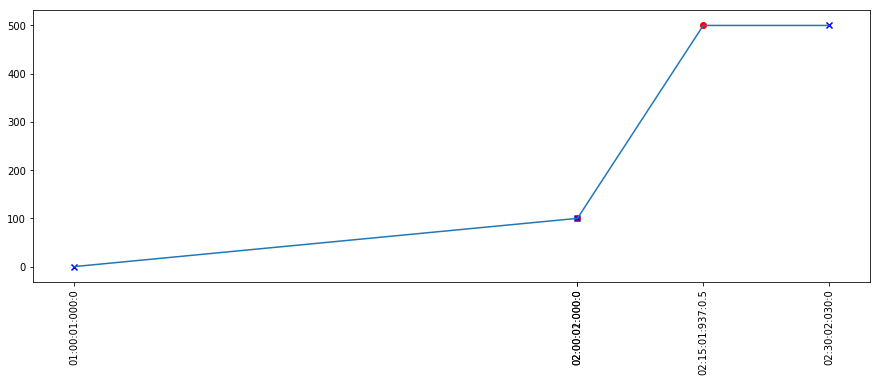

In [156]:
plt.figure(figsize=(15, 5))
plt.plot(*zip(*processed))
for marker, event, color in [('o', '(int)', 'r'), ('x', '(ext)', 'b')]:
    plt.scatter(*zip(*[x for (x,d) in zip(processed, data) if d[2] == event]), marker=marker, color=color)
plt.xticks([x[0] for x in processed], [x[0] for x in data], rotation='vertical')
pass

In [118]:
list(zip(*[x for (x,d) in zip(processed, data) if d[2] == '(int)']))

[(4321000.0,
  7201000.0,
  7202000.0,
  10802030.0,
  14461000.0,
  16238500.0,
  16418500.0,
  17138500.0,
  18062000.0,
  21663000.0),
 (100, 500, 500, 0, 500, 0, 100, 500, 500, 500)]

In [ ]:
data[]